# TOPIC 4:Fraud Detection_1
# LOGISTIC REGRESSION CLASSIFIER
In this project, we will use the data set sourced by ULB machine learning group and provided by Kaggle to build and implement a Logistic classifier that will classify with high accuracy credit card transactions as non-fraud or fraudulent transactions.<br>
The data set can be found here https://www.kaggle.com/mlg-ulb/creditcardfraud<br>
<ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(5,5)})
#To display all columns name
pd.options.display.max_columns = None

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
credit_card_back_up = pd.read_csv(r"D:\DataBases\DataSets\creditcard.csv")
df_shape = (credit_card_back_up.shape)
credit_card = credit_card_back_up.copy()
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
credit_card.head()

There are 284807 rows and 31 columns in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#We have to scale the features Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

In [69]:
std_scaler = StandardScaler()

std_scaler.fit(credit_card.drop("Class", axis=1))
scaled_features = std_scaler.transform(credit_card.drop("Class", axis=1))

In [70]:
df_scaled_features = pd.DataFrame(scaled_features, columns= credit_card.columns[:-1])

# 1.WITH UNBALANCED DATA

In [71]:
#We split the data into 70% training and 30 testing
X= scaled_features
y=credit_card["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
#We define a function to calculate our performance metrics
def evaluate_preds(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F-1: {f1*100:.2f}%")
    
    return metric_dict

**We used RandomizedSearchCV to search for optimal parameters**

In [74]:
#from sklearn.model_selection import RandomizedSearchCV
#We create a dictinnay containing the parameters we would like to adjust as the keys and then the values 
#we would like to try as the values of the dict
penalties = np.arange(1,21,1)
grid={"C":penalties,
      "class_weight":["balanced"],
      "penalty":["l1", "l2", "elasticnet", "none"]}
#...
clf= LogisticRegression()
#rsCV
rscv_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                             n_iter=10,#number of model to try
                             cv=5,
                             verbose=2)
#fit the RandomizedSearchCv version of clf
rscv_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
rscv_y_pred = rscv_clf.predict(X_test)
#We evaluate the prediction
rscv_metrics = evaluate_preds(y_test, rscv_y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l1, class_weight=balanced, C=2 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=2, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=2 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=2, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=2 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=2, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=2 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=2, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=2 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=2, total=   0.0s
[CV] penalty=none, class_weight=balanced, C=19 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ........ penalty=none, class_weight=balanced, C=19, total=   1.0s
[CV] penalty=none, class_weight=balanced, C=19 .......................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ........ penalty=none, class_weight=balanced, C=19, total=   1.3s
[CV] penalty=none, class_weight=balanced, C=19 .......................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ........ penalty=none, class_weight=balanced, C=19, total=   1.3s
[CV] penalty=none, class_weight=balanced, C=19 .......................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ........ penalty=none, class_weight=balanced, C=19, total=   1.5s
[CV] penalty=none, class_weight=balanced, C=19 .......................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ........ penalty=none, class_weight=balanced, C=19, total=   1.2s
[CV] penalty=none, class_weight=balanced, C=4 ........................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ......... penalty=none, class_weight=balanced, C=4, total=   1.0s
[CV] penalty=none, class_weight=balanced, C=4 ........................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ......... penalty=none, class_weight=balanced, C=4, total=   1.3s
[CV] penalty=none, class_weight=balanced, C=4 ........................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ......... penalty=none, class_weight=balanced, C=4, total=   1.3s
[CV] penalty=none, class_weight=balanced, C=4 ........................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ......... penalty=none, class_weight=balanced, C=4, total=   1.4s
[CV] penalty=none, class_weight=balanced, C=4 ........................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ......... penalty=none, class_weight=balanced, C=4, total=   1.1s
[CV] penalty=elasticnet, class_weight=balanced, C=15 .................
[CV] .. penalty=elasticnet, class_weight=balanced, C=15, total=   0.0s
[CV] penalty=elasticnet, class_weight=balanced, C=15 .................
[CV] .. penalty=elasticnet, class_weight=balanced, C=15, total=   0.0s
[CV] penalty=elasticnet, class_weight=balanced, C=15 .................
[CV] .. penalty=elasticnet, class_weight=balanced, C=15, total=   0.0s
[CV] penalty=elasticnet, class_weight=balanced, C=15 .................
[CV] .. penalty=elasticnet, class_weight=balanced, C=15, total=   0.0s
[CV] penalty=elasticnet, class_weight=balanced, C=15 .................
[CV] .. penalty=elasticnet, class_weight=balanced, C=15, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=17 .........................
[CV] .......... penalty=l1, class_weight=balanced, C=17, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=17 .........................

C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] .......... penalty=l1, class_weight=balanced, C=17, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=17 .........................
[CV] .......... penalty=l1, class_weight=balanced, C=17, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=17 .........................
[CV] .......... penalty=l1, class_weight=balanced, C=17, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=17 .........................
[CV] .......... penalty=l1, class_weight=balanced, C=17, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=6 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=6, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=6 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=6, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=6 ..........................
[CV] ........... penalty=l1, class_weight=balanced, C=6, total=   0.0s
[CV] penalty=l1, class_weight=balanced, C=6 ..........................
[CV] 

C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] .......... penalty=l1, class_weight=balanced, C=16, total=   0.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.5s finished


Accuracy: 97.66%
Precision: 0.06
Recall: 0.94
F-1: 0.11


In [75]:
#call the estimator with the best result 
rscv_clf.best_params_

{'penalty': 'l2', 'class_weight': 'balanced', 'C': 1}

**We used GridSearchCV to tune the optimal parameters obtained from RandomizedSearchCV**

In [76]:
#We take the best parameters previously obtained
#grid2 = best parameters grid 1
penalties = np.arange(1,2,0.1)
grid_2={"C":penalties,
        "class_weight":["balanced"],
        "penalty":["l2"]}

clf= LogisticRegression()
#rsCV
gscv_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

#fit the GridSearchCV version of clf
gscv_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
gscv_y_pred = gscv_clf.predict(X_test)
#We evaluate the prediction
gscv_metrics = evaluate_preds(y_test, gscv_y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.0, class_weight=balanced, penalty=l2 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=1.0, class_weight=balanced, penalty=l2, total=   0.9s
[CV] C=1.0, class_weight=balanced, penalty=l2 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=1.0, class_weight=balanced, penalty=l2, total=   1.1s
[CV] C=1.0, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.0, class_weight=balanced, penalty=l2, total=   1.1s
[CV] C=1.0, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.0, class_weight=balanced, penalty=l2, total=   1.6s
[CV] C=1.0, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.0, class_weight=balanced, penalty=l2, total=   1.2s
[CV] C=1.1, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.1, class_weight=balanced, penalty=l2, total=   1.0s
[CV] C=1.1, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.1, class_weight=balanced, penalty=l2, total=   1.0s
[CV] C=1.1, class_weight=balanced, penalty=l2 ........................
[CV] ......... C=1.1, class_weight=balanced, penalty=l2, total=   1.1s
[CV] C=1.1, class_weight=balanced, penalty=l2 ........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


Accuracy: 97.66%
Precision: 0.06
Recall: 0.94
F-1: 0.11


In [77]:
#call the estimator with the best result 
gscv_clf.best_params_

{'C': 1.6000000000000005, 'class_weight': 'balanced', 'penalty': 'l2'}

In [78]:
#Baseline model
lr_clf = LogisticRegression(C = 1.60, class_weight = 'balanced', penalty= 'l2')
#We fit the model with the traing data
lr_clf.fit(X_train, y_train)
#baseline prediction
y_pred = lr_clf.predict(X_test)
#Evaluate the model on validation set 
baseline_metrics = evaluate_preds(y_test, y_pred)

Accuracy: 97.66%
Precision: 0.06
Recall: 0.94
F-1: 0.11


**Confusion Matrix**

In [79]:
print('Using Balanced Class Weight Data')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Using Balanced Class Weight Data


[[83323  1994]
 [    7   119]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85317
           1       0.06      0.94      0.11       126

    accuracy                           0.98     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.98      0.99     85443



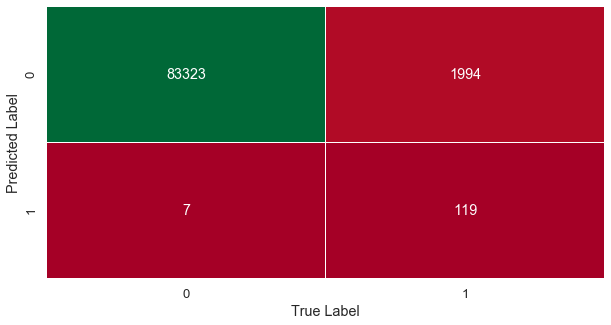

In [80]:
#Visualize cm with seaborn
sns.set(font_scale=1.2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
           annot=True,
           cbar=False,
           cmap="RdYlGn",
           linewidths=0.30,
           fmt="");
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

**ROC_AUC_CURVE**


 ROC_AUC_CURVE


 ROC AUC SCORE: 0.96




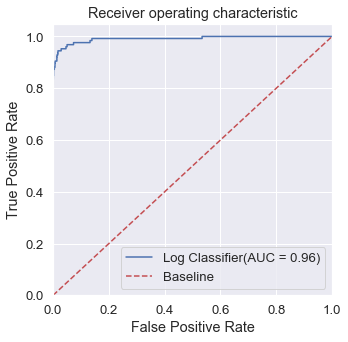

In [83]:
print('\n ROC_AUC_CURVE\n')
log_roc_auc = roc_auc_score(y_test, y_pred)
print('\n ROC AUC SCORE: %0.2f' % log_roc_auc)
print('\n')
y_prob = lr_clf.predict_proba(X_test)
#only positive(correct) predictions
y_prob_positive = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Log Classifier(AUC = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Baseline")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# 2.WITH BALANCED DATA 

In [5]:
unbalanced_df = credit_card

unbalanced_df = unbalanced_df.sample(frac=1)

fraud = unbalanced_df.loc[unbalanced_df["Class"]==1]
non_fraud = unbalanced_df.loc[unbalanced_df["Class"]==0][:492]
balanced_df = pd.concat([fraud, non_fraud])

shuffled_df = balanced_df.sample(frac=1, random_state=88)

print("Distribution of the classes in the subsample dataset")
print(shuffled_df["Class"].value_counts()/len(shuffled_df))

Distribution of the classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


In [8]:
std_scaler = StandardScaler()

std_scaler.fit(shuffled_df.drop("Class", axis=1))
bal_scaled_features = std_scaler.transform(shuffled_df.drop("Class", axis=1))

In [9]:
X= bal_scaled_features
y= shuffled_df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**We used RandomizedSearchCV to search for optimal parameters**

In [13]:
#from sklearn.model_selection import RandomizedSearchCV
#We create a dictinnay containing the parameters we would like to adjust as the keys and then the values 
#we would like to try as the values of the dict
penalties = np.arange(1,21,1)
grid={"C":penalties,
      "penalty":["l1", "l2", "elasticnet", "none"],
      "random_state":[0]}
#...
clf= LogisticRegression(max_iter=1000)
#rsCV
rscv_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                             n_iter=10,#number of model to try
                             cv=5,
                             verbose=2)
#fit the RandomizedSearchCv version of clf
rscv_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
rscv_y_pred = rscv_clf.predict(X_test)
#We evaluate the prediction
rscv_metrics = evaluate_preds(y_test, rscv_y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=0, penalty=l1, C=10 ................................
[CV] ................. random_state=0, penalty=l1, C=10, total=   0.0s
[CV] random_state=0, penalty=l1, C=10 ................................
[CV] ................. random_state=0, penalty=l1, C=10, total=   0.0s
[CV] random_state=0, penalty=l1, C=10 ................................
[CV] ................. random_state=0, penalty=l1, C=10, total=   0.0s
[CV] random_state=0, penalty=l1, C=10 ................................
[CV] ................. random_state=0, penalty=l1, C=10, total=   0.0s
[CV] random_state=0, penalty=l1, C=10 ................................
[CV] ................. random_state=0, penalty=l1, C=10, total=   0.0s
[CV] random_state=0, penalty=l2, C=6 .................................
[CV] .................. random_state=0, penalty=l2, C=6, total=   0.0s
[CV] random_state=0, penalty=l2, C=6 .................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

[CV] ................ random_state=0, penalty=none, C=2, total=   0.4s
[CV] random_state=0, penalty=none, C=2 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=2, total=   0.4s
[CV] random_state=0, penalty=none, C=2 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=2, total=   0.4s
[CV] random_state=0, penalty=none, C=2 ...............................
[CV] ................ random_state=0, penalty=none, C=2, total=   0.3s
[CV] random_state=0, penalty=none, C=2 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................ random_state=0, penalty=none, C=2, total=   0.4s
[CV] random_state=0, penalty=l2, C=10 ................................
[CV] ................. random_state=0, penalty=l2, C=10, total=   0.0s
[CV] random_state=0, penalty=l2, C=10 ................................
[CV] ................. random_state=0, penalty=l2, C=10, total=   0.0s
[CV] random_state=0, penalty=l2, C=10 ................................
[CV] ................. random_state=0, penalty=l2, C=10, total=   0.0s
[CV] random_state=0, penalty=l2, C=10 ................................
[CV] ................. random_state=0, penalty=l2, C=10, total=   0.0s
[CV] random_state=0, penalty=l2, C=10 ................................
[CV] ................. random_state=0, penalty=l2, C=10, total=   0.0s

C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



[CV] random_state=0, penalty=none, C=3 ...............................
[CV] ................ random_state=0, penalty=none, C=3, total=   0.4s
[CV] random_state=0, penalty=none, C=3 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=3, total=   0.4s
[CV] random_state=0, penalty=none, C=3 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=3, total=   0.4s
[CV] random_state=0, penalty=none, C=3 ...............................
[CV] ................ random_state=0, penalty=none, C=3, total=   0.4s
[CV] random_state=0, penalty=none, C=3 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs support

[CV] ................ random_state=0, penalty=none, C=3, total=   0.3s
[CV] random_state=0, penalty=elasticnet, C=15 ........................
[CV] ......... random_state=0, penalty=elasticnet, C=15, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=15 ........................
[CV] ......... random_state=0, penalty=elasticnet, C=15, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=15 ........................
[CV] ......... random_state=0, penalty=elasticnet, C=15, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=15 ........................
[CV] ......... random_state=0, penalty=elasticnet, C=15, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=15 ........................
[CV] ......... random_state=0, penalty=elasticnet, C=15, total=   0.0s
[CV] random_state=0, penalty=none, C=20 ..............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ............... random_state=0, penalty=none, C=20, total=   0.3s
[CV] random_state=0, penalty=none, C=20 ..............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ............... random_state=0, penalty=none, C=20, total=   0.5s
[CV] random_state=0, penalty=none, C=20 ..............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ............... random_state=0, penalty=none, C=20, total=   0.4s
[CV] random_state=0, penalty=none, C=20 ..............................
[CV] ............... random_state=0, penalty=none, C=20, total=   0.4s
[CV] random_state=0, penalty=none, C=20 ..............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs support

[CV] ............... random_state=0, penalty=none, C=20, total=   0.4s
[CV] random_state=0, penalty=l1, C=12 ................................
[CV] ................. random_state=0, penalty=l1, C=12, total=   0.0s
[CV] random_state=0, penalty=l1, C=12 ................................
[CV] ................. random_state=0, penalty=l1, C=12, total=   0.0s
[CV] random_state=0, penalty=l1, C=12 ................................
[CV] ................. random_state=0, penalty=l1, C=12, total=   0.0s
[CV] random_state=0, penalty=l1, C=12 ................................
[CV] ................. random_state=0, penalty=l1, C=12, total=   0.0s
[CV] random_state=0, penalty=l1, C=12 ................................
[CV] ................. random_state=0, penalty=l1, C=12, total=   0.0s
[CV] random_state=0, penalty=none, C=9 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=9, total=   0.4s
[CV] random_state=0, penalty=none, C=9 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=9, total=   0.4s
[CV] random_state=0, penalty=none, C=9 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=9, total=   0.4s
[CV] random_state=0, penalty=none, C=9 ...............................
[CV] ................ random_state=0, penalty=none, C=9, total=   0.4s
[CV] random_state=0, penalty=none, C=9 ...............................


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ................ random_state=0, penalty=none, C=9, total=   0.4s
[CV] random_state=0, penalty=elasticnet, C=8 .........................
[CV] .......... random_state=0, penalty=elasticnet, C=8, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=8 .........................
[CV] .......... random_state=0, penalty=elasticnet, C=8, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=8 .........................
[CV] .......... random_state=0, penalty=elasticnet, C=8, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=8 .........................
[CV] .......... random_state=0, penalty=elasticnet, C=8, total=   0.0s
[CV] random_state=0, penalty=elasticnet, C=8 .........................
[CV] .......... random_state=0, penalty=elasticnet, C=8, total=   0.0s
Accuracy: 94.93%
Precision: 0.99
Recall: 0.90
F-1: 0.95


C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nherm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.9s finished


In [14]:
#call the estimator with the best result 
rscv_clf.best_params_

{'random_state': 0, 'penalty': 'l2', 'C': 10}

**We used GridSearchCV to tune the optimal parameters obtained from RandomizedSearchCV**

In [15]:
#We take the best parameters previously obtained
#grid2 = best parameters grid 1
penalties = np.arange(10,12,0.1)
grid_2={"C":penalties,
        "random_state":[0],
        "penalty":["l2"]}

clf= LogisticRegression(max_iter=1000)
#rsCV
gscv_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

#fit the GridSearchCV version of clf
gscv_clf.fit(X_train, y_train)
#Make prediction with the best hyperparameters
gscv_y_pred = gscv_clf.predict(X_test)
#We evaluate the prediction
gscv_metrics = evaluate_preds(y_test, gscv_y_pred)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=10.0, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.0, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.0, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.0, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.0, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.0, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.0, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.0, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.0, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.0, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.1, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.1, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.1, penalty=l2, random_state=0 ..............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=10.1, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.1, penalty=l2, random_state=0, total=   0.1s
[CV] C=10.1, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.1, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.1, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.1, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.2, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.2, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.2, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.2, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.2, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.2, penalty=l2, random_state=0, total=   0.0s
[CV] C=10.2, penalty=l2, random_state=0 ..............................
[CV] ............... C=10.2, penalty=l2, random_state=0, total=   0.0s
[CV] 

[CV] . C=11.399999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.399999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.399999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.399999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.399999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.399999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.399999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.399999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.399999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.499999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.499999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.499999999999995, penalty=l2, random_state=0 ................
[CV] . C=11.499999999999995, penalty=l2, random_state=0, total=   0.0s
[CV] C=11.499999999999995, penalty=l2, random_state=0 ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


In [16]:
gscv_clf.best_params_

{'C': 10.0, 'penalty': 'l2', 'random_state': 0}

In [22]:
#To instantiate the model
lr_clf = LogisticRegression(C=10, penalty= 'l2', random_state= 0, max_iter=1000)
#We fit the model with the traing data
lr_clf.fit(X_train, y_train)
#baseline prediction
y_pred = lr_clf.predict(X_test)
#Evaluate the model on validation set 
gscv_metrics = evaluate_preds(y_test, y_pred)

Accuracy: 94.93%
Precision: 99.24%
Recall: 90.28%
F-1: 94.55%


**Confusion Matrix**

In [19]:
print('Using Balanced Data')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Using Balanced Data


[[151   1]
 [ 14 130]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       152
           1       0.99      0.90      0.95       144

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



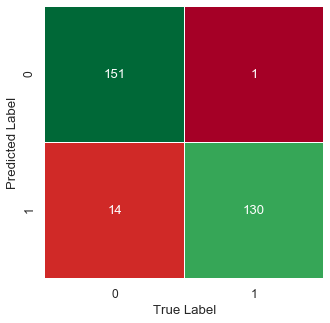

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
#Visualize cm with seaborn
sns.set(font_scale=1.1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
           annot=True,
           cbar=False,
           cmap="RdYlGn",
           linewidths=0.30,
           fmt="");
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

**ROC_AUC_CURVE**


 ROC_AUC_CURVE


 ROC AUC SCORE: 0.93




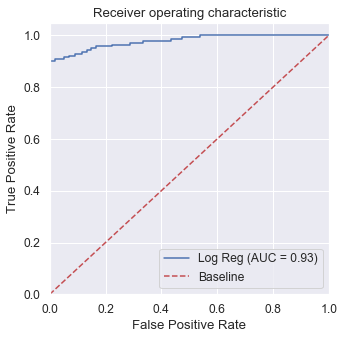

In [97]:
print('\n ROC_AUC_CURVE\n')
logit_roc_auc = roc_auc_score(y_test, y_pred)
print('\n ROC AUC SCORE: %0.2f' % logit_roc_auc)
print('\n')
y_prob = lr_clf.predict_proba(X_test)
#only positive(correct) predictions
y_prob_positive = y_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Log Reg (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Baseline")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()